# Faltningssatsen i Fourieranalys

## Introduktion

Faltningssatsen är en fundamental sats i Fourieranalys som beskriver hur faltning i tidsdomänen övergår till multiplikation i frekvensdomänen. Denna sats har bred tillämpning inom signalbehandling, bildbehandling och fysik. Den här övningen avser att illustrera faltning och faltningssatsen.

### Definition av Faltning

För två funktioner $f(t)$ och $g(t)$ definieras faltningen som
$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau
$$

### Faltningssatsen

Fouriertransformen av en funktion $f(t)$ definieras som:
$$
\mathcal{F}\{f(t)\} = F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-i\omega t} dt
$$


**Sats:** Om $f(t)$ och $g(t)$ har fouriertransformer $F(ω)$ respektive $G(ω)$, då gäller
$$
\mathcal{F}\{f(t) * g(t)\} = F(\omega) \cdot G(\omega)
$$

## Övning 

1. Nedan ges några par av funktioner i pythonkod. Plotta de enskilda funktionerna samt deras faltning i en figur. Använd `signal.convolve` för beräkning av faltningen.
2. Använd `np.fft.fft` för att beräkna fouriertransformen av funktionerna samt faltningen. Plotta de tre transformern och jämför $\widehat{f*g}$ med produkten av termernas fouriertransformer. Använd `np.fft.fftfreq` och `np.fft.fftshift` för att få en frekvensaxel. 

```python
# Exempel 1: Rektangulära pulser 
t = np.linspace(-5, 5, 1000)
f1 = np.where((t >= -1) & (t <= 1), 1, 0)  # Rektangel från -1 till 1
g1 = np.where((t >= -0.5) & (t <= 0.5), 1, 0)  # Rektangel från -0.5 till 0.5

# Exempel 2: Gaussiska pulser
f2 = np.exp(-t**2 / (2*0.5**2))  # Gaussisk puls med σ=0.5
g2 = np.exp(-t**2 / (2*0.3**2))  # Gaussisk puls med σ=0.3

### Exempel 3: Sinus med olika frekvenser
f3 = np.sin(2*np.pi*2*t) * np.exp(-t**2/4)  # Sinus 2Hz med gaussisk envelop
g3 = np.sin(2*np.pi*5*t) * np.exp(-t**2/4)  # Sinus 5Hz med gaussisk envelop
```


## Exempel 1 löst

Nedan löser jag uppgiften för det första paret. Packa ihop lösningen till några funktionsrutiner och lös för de övriga. Kommentera utseendet på fouriertransformerna om ni tycker att det är vad ni förväntar er. 

In [52]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from scipy import signal
# Ställ in plottstil
plt.style.use('seaborn-v0_8-whitegrid')

In [53]:
# Tidsdomänen 
t = np.linspace(-5, 5, 1000)
dt = t[1] - t[0]  # Tidssteg

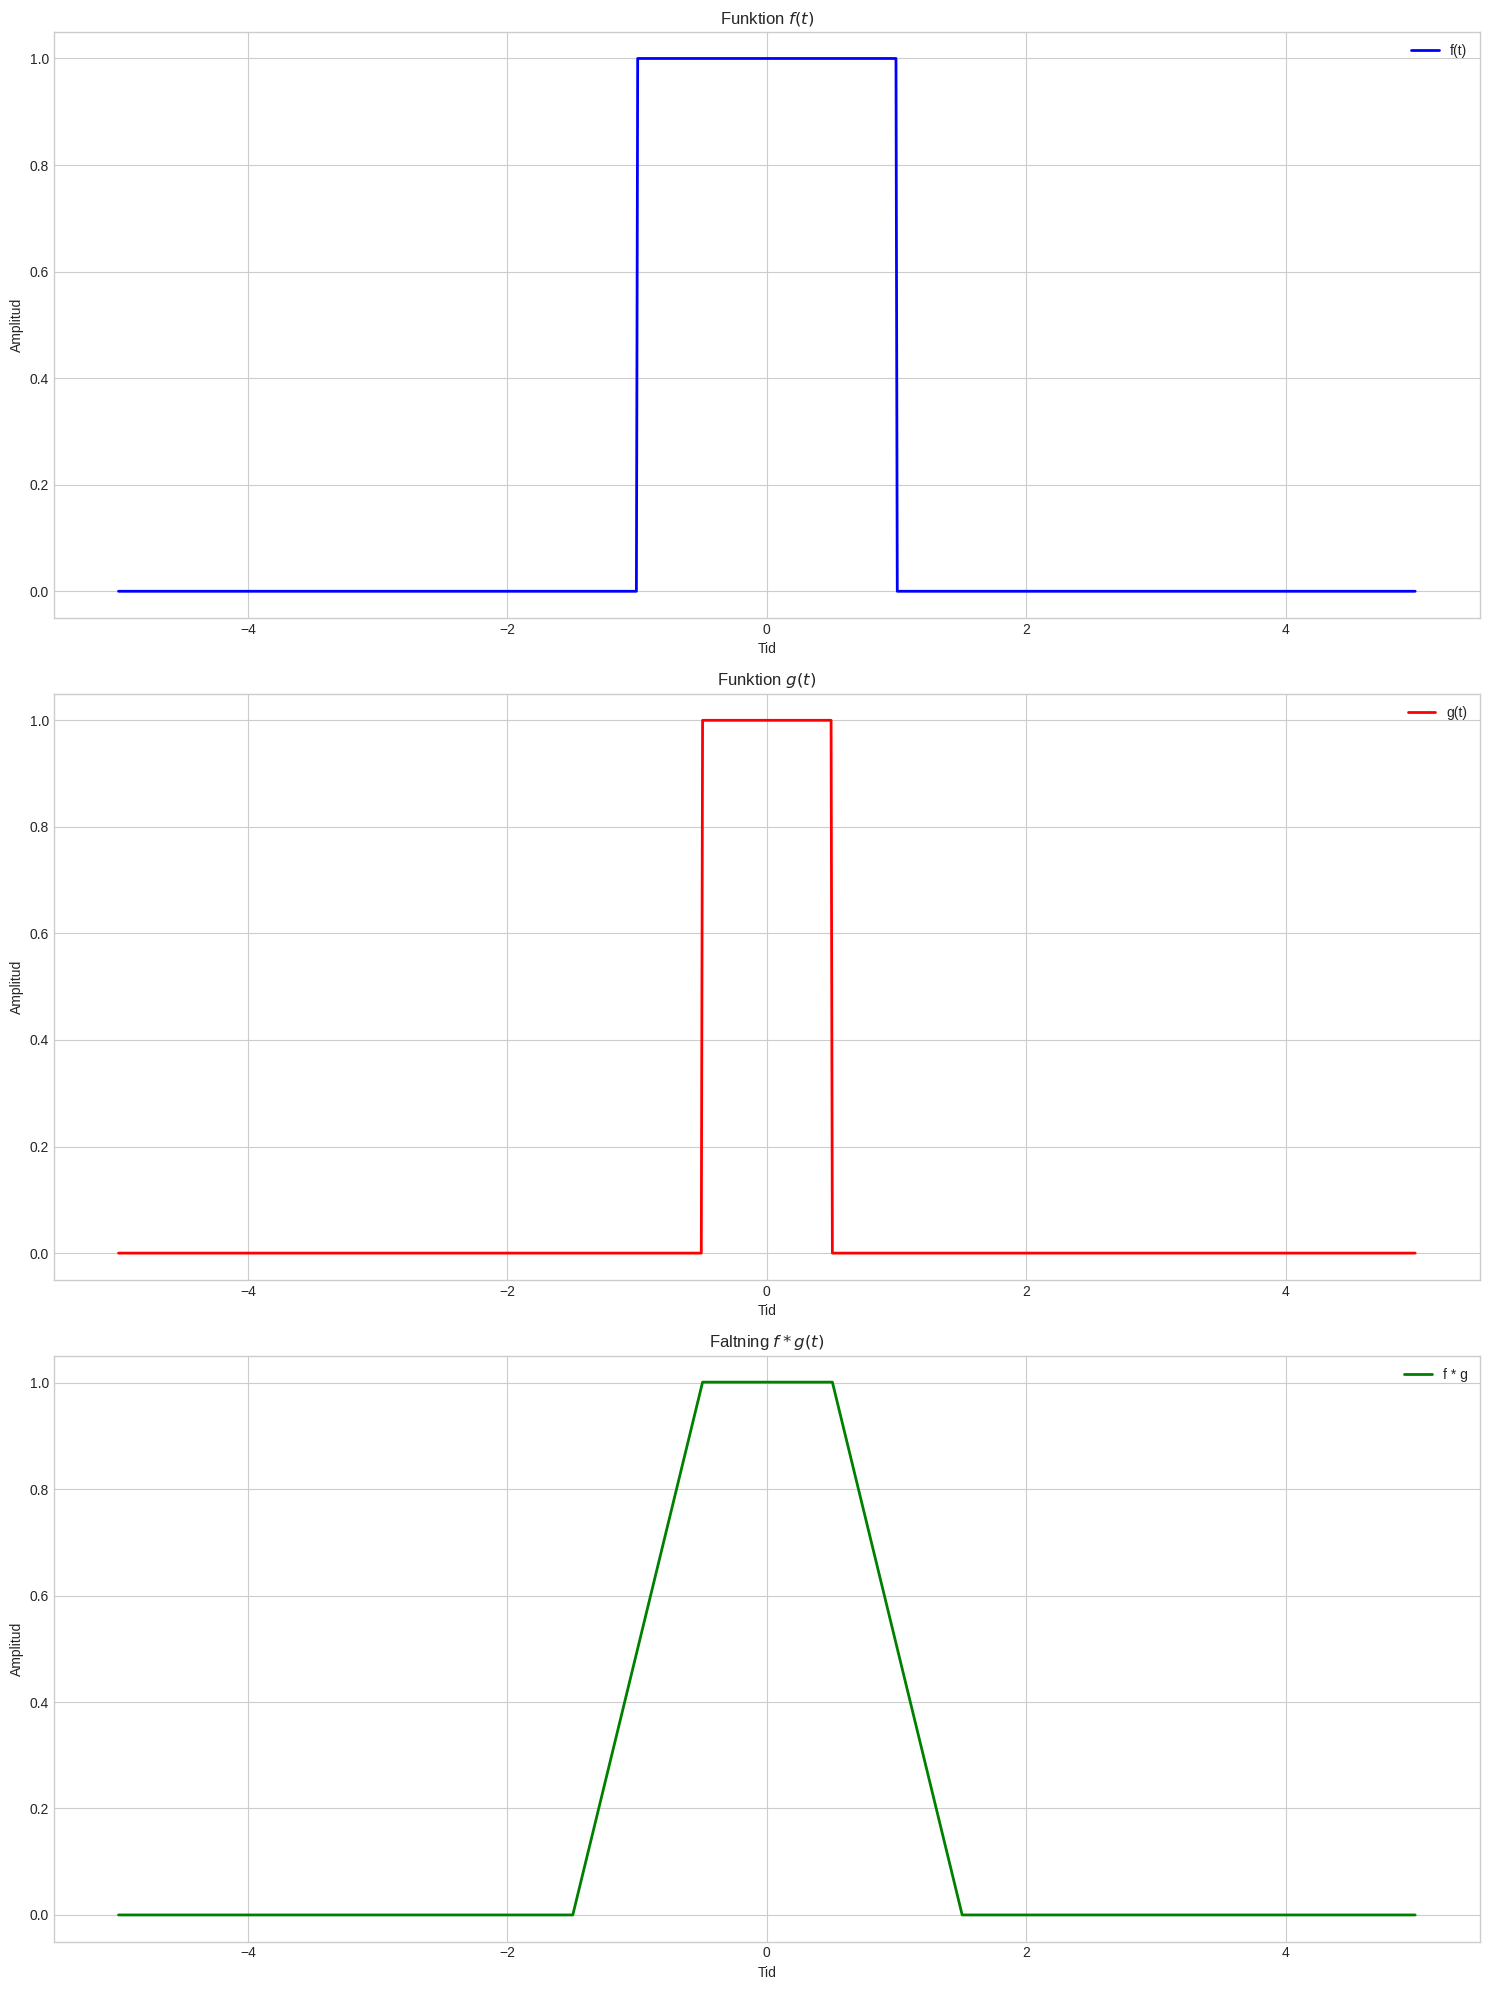

In [54]:
# Definiera funktionerna
f1 = np.where((t >= -1) & (t <= 1), 1, 0)  # Rektangel från -1 till 1
g1 = np.where((t >= -0.5) & (t <= 0.5), 1, 0)  # Rektangel från -0.5 till 0.5

# Beräkna faltning
conv_result = signal.convolve(f1, g1, mode='same') * dt  # Normalisera med dt

# Plotta resultaten
plt.subplots(3,1, figsize=(15, 20))

# Tidsdomänen
plt.subplot(3,1,1)
plt.plot(t, f1, 'b-', linewidth=2, label='f(t)')
plt.title(r'Funktion $f(t)$')
plt.xlabel('Tid')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(t, g1, 'r-', linewidth=2, label='g(t)')
plt.title('Funktion $g(t)$')
plt.xlabel('Tid')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(3,1,3)
plt.plot(t, conv_result, 'g-', linewidth=2, label='f * g')
plt.title(r'Faltning $f * g(t)$')
plt.xlabel('Tid')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Transformplottarna 

Följande funktion `myfft` beräkna en approximation av den kontinuerliga FT. Notera att frekvenserna shiftas.

In [55]:
def myfft(x): 
    return fft.fftshift(fft.fft(x))

In [56]:
# Termernas tranformer
F1 = myfft(f1)
G1 = myfft(g1)

# FFT av faltningen
CONV_FFT = myfft(conv_result)

# Frekvensaxel
freq = fft.fftshift(fft.fftfreq(len(t), dt))

# Produkt av FFT-erna (motsvarar faltning i tidsdomänen)
PRODUCT_FFT = F1 * G1 * dt


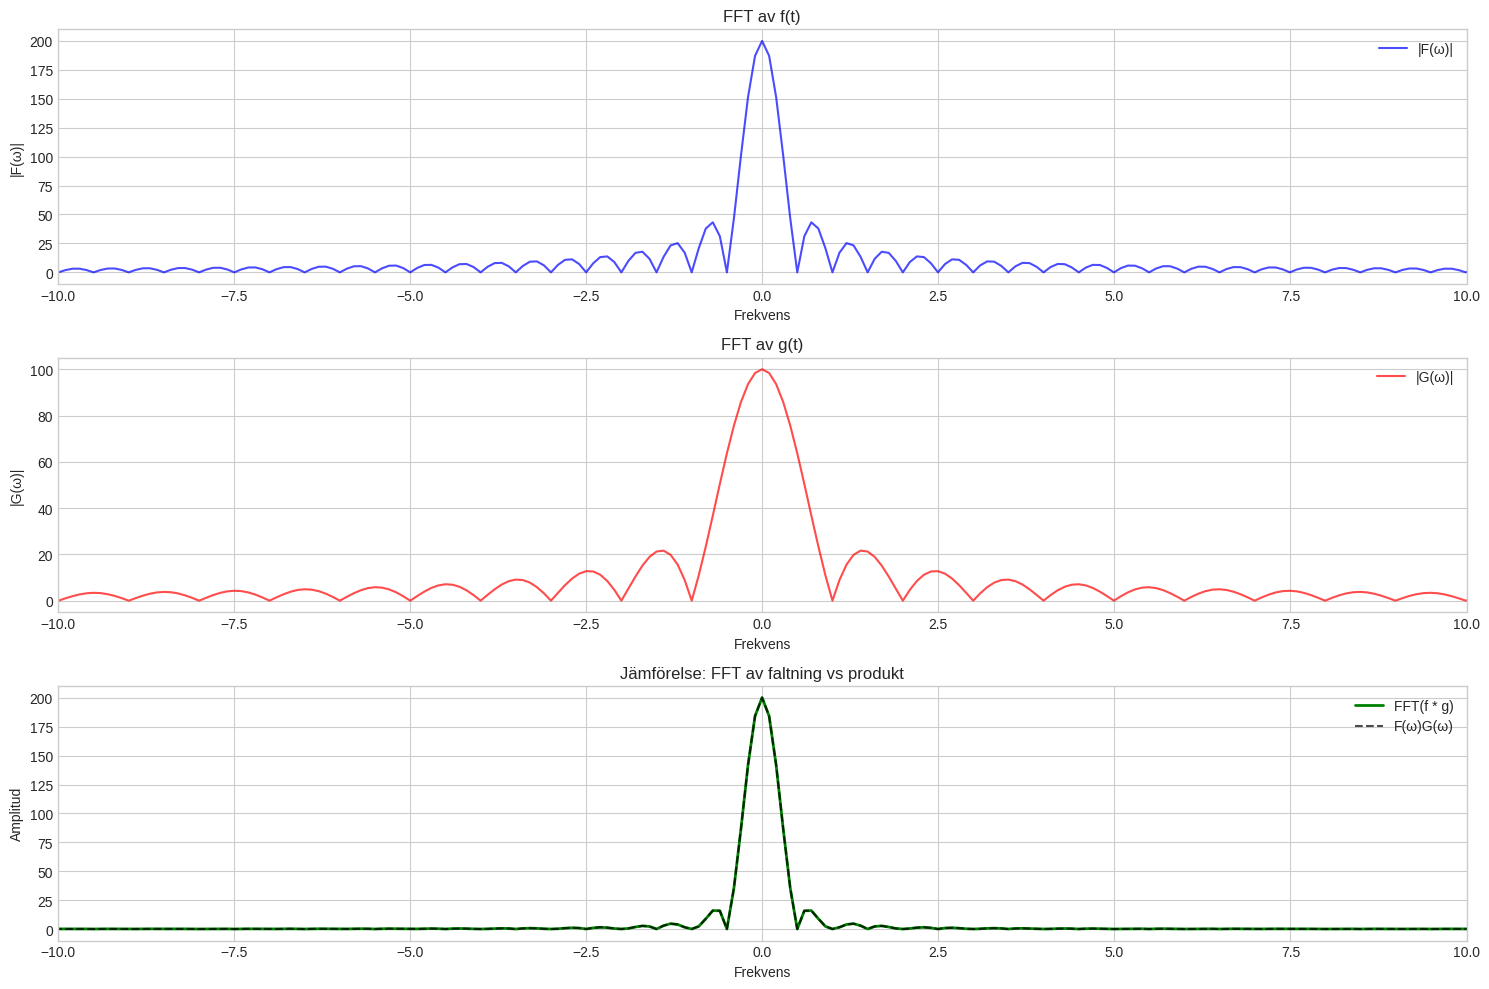

In [57]:
fig, axes = plt.subplots(3,1, figsize=(15, 10))
axes[0].plot(freq, np.abs(F1), 'b-', alpha=0.7, label='|F(ω)|')
axes[0].set_title('FFT av f(t)')
axes[0].set_xlabel('Frekvens')
axes[0].set_ylabel('|F(ω)|')
axes[0].grid(True)
axes[0].legend()
axes[0].set_xlim(-10, 10)

axes[1].plot(freq,np.abs(G1), 'r-', alpha=0.7, label='|G(ω)|')
axes[1].set_title('FFT av g(t)')
axes[1].set_xlabel('Frekvens')
axes[1].set_ylabel('|G(ω)|')
axes[1].grid(True)
axes[1].legend()
axes[1].set_xlim(-10, 10)

# Jämförelse av FFT(convolution) och produkt av FFT:er
axes[2].plot(freq, np.abs(CONV_FFT), 'g-', linewidth=2, label='FFT(f * g)')
axes[2].plot(freq, np.abs(PRODUCT_FFT), 'k--', alpha=0.7, label='F(ω)G(ω)')
axes[2].set_title('Jämförelse: FFT av faltning vs produkt')
axes[2].set_xlabel('Frekvens')
axes[2].set_ylabel('Amplitud')
axes[2].grid(True)
axes[2].legend()
axes[2].set_xlim(-10, 10)

plt.tight_layout()
plt.show()